# IMDB Movies Visualization

## Author: Chisheng Li

Retrieve the updated IMDB datasets `countries.list.gz`, `genres.list.gz` and `ratings.list.gz` at ftp://ftp.fu-berlin.de/pub/misc/movies/database/.

## 1) Create a world map to display the average movie rating by country. 
Open `countries.list` and `ratings.list`, merge the files with the same movie names along with their IMDB rating score and country of origin and output to `countryRating.txt`.

In [1]:
ratingsFile = open('ratings.list','r')
countriesFile = open('countries.list','r')
output = open('countryRating.txt','w')

In [2]:
# Start readline() at the appropriate line
while True:
    if countriesFile.readline() == "COUNTRIES LIST\n":
        break;
countriesFile.readline()

while True:
    if ratingsFile.readline() == "MOVIE RATINGS REPORT\n":
        break;
ratingsFile.readline()
ratingsFile.readline()

'New  Distribution  Votes  Rank  Title\n'

Extract the first movie record from ratings file

In [3]:
ratingLine = ratingsFile.readline().rstrip("\n")
ratingLine = ratingLine.split()
ratingMovieName = " ".join(ratingLine[3:len(ratingLine)])
rating = ratingLine[2]

Extract the first movie record from countries file

In [4]:
countriesLine = countriesFile.readline().rstrip("\n")
i = countriesLine.rfind(")")
countries = countriesLine[i+1:len(countriesLine)]
countries = countries.strip("\t")
while countriesLine[i]!="\t":
    i-=1
countriesMovieName = countriesLine[0:i+1]
countriesMovieName = countriesMovieName.replace("	","")
countriesMovieName = countriesMovieName.rstrip(" ")

In [5]:
while True:
    # Iterating over records from file
    if ratingLine == "" or countriesLine[0:3] == "---":
        break
    
    # Skipping episodes from serials
    if ratingMovieName.find("{") !=-1:
        ratingLine = ratingsFile.readline().rstrip("\n")
        if ratingLine == "":
            break
        ratingLine = ratingLine.split()
        ratingMovieName = " ".join(ratingLine[3:len(ratingLine)])
        rating = ratingLine[2]
        continue
    
    if countriesLine.find("{")!=-1 or countriesLine.find(")")==-1:
        countriesLine = countriesFile.readline().rstrip("\n")
        if countriesLine[0:3] == "---":
            break
        i = countriesLine.rfind(")")
        countries = countriesLine[i+1:len(countriesLine)]
        countries = countries.strip("\t")
        while countriesLine[i]!="\t":
            i-=1
        countriesMovieName = countriesLine[0:i+1]
        countriesMovieName = countriesMovieName.replace("	","")
        countriesMovieName = countriesMovieName.rstrip(" ")
        continue
    
    # Adding matched record from ratings and countries file
    if ratingMovieName == countriesMovieName:
        output.write(ratingMovieName)
        output.write("\t")
        output.write(rating)
        output.write("\t")
        output.write(countries)
        output.write("\n")
        ratingLine = ratingsFile.readline().rstrip("\n")
        if ratingLine == "":
            break
        ratingLine = ratingLine.split()
        ratingMovieName = " ".join(ratingLine[3:len(ratingLine)])
        rating = ratingLine[2]
        
        countriesLine = countriesFile.readline().rstrip("\n")
        if countriesLine[0:3] == "---":
            break
        if countriesLine.find(")")==-1:
            continue
        i = countriesLine.rfind(")")
        countries = countriesLine[i+1:len(countriesLine)]
        countries = countries.strip("\t")
        while countriesLine[i] != "\t":
            i-=1
        countriesMovieName = countriesLine[0:i+1]
        countriesMovieName = countriesMovieName.replace("	","")
        countriesMovieName = countriesMovieName.rstrip(" ")
        continue
    
    if ratingLine == "" or countriesLine[0:3] == "---":
        break
    
    while ratingMovieName < countriesMovieName:
        ratingLine = ratingsFile.readline().rstrip("\n")
        if ratingLine == "":
            break
        if ratingLine.find("{")!=-1:
            continue
        ratingLine = ratingLine.split()
        ratingMovieName = " ".join(ratingLine[3:len(ratingLine)])
        rating = ratingLine[2]
    
    while countriesMovieName < ratingMovieName:
        countriesLine = countriesFile.readline().rstrip("\n")
        if countriesLine[0:3] == "---":
            break
        if countriesLine.find(")") == -1 or countriesLine.find("{")!=-1:
            continue
        i = countriesLine.rfind(")")
        countries = countriesLine[i+1:len(countriesLine)]
        countries = countries.strip("\t")
        while countriesLine[i]!="\t":
            i-=1
        countriesMovieName = countriesLine[0:i+1]
        countriesMovieName = countriesMovieName.replace("	","")
        countriesMovieName = countriesMovieName.rstrip(" ")

Close the files

In [6]:
ratingsFile.close()
countriesFile.close()
output.close()

Open `countryRating.txt` and calculate the average IMDB movie rating for each country

In [7]:
import csv
from collections import defaultdict, namedtuple
from operator import attrgetter, itemgetter
from itertools import imap

In [8]:
CountryRating = namedtuple('CountryRating', 'countryorigin ratingscore')

fieldnames = 'name', 'score', 'country'
score_and_country = itemgetter('score', 'country')
ratings = defaultdict(list)

In [9]:
with open("countryRating.txt", "r") as moviefile:
    movies = csv.DictReader(moviefile, fieldnames=fieldnames, delimiter='\t')
    for score, country in imap(score_and_country, movies):
        # Relabel some countries to their present day counterparts
        if country == 'West Germany':
            country = 'Germany'
        if country == 'East Germany':
            country = 'Germany'
        if country == 'North Vietnam':
            country = 'Vietnam'
        if country == 'Korea':
            country = 'South Korea'
        if country == 'Palestine':
            country = 'Occupied Palestinian Territory'
        if country == 'Soviet Union':
            country = 'Russia'
        if country == 'Dominica':
            country = 'Dominican Republic'
        if country == 'Yugoslavia':
            country = 'Federal Republic of Yugoslavia'
        ratings[country].append(float(score))

In [10]:
average = lambda alist: sum(alist) / len(alist)
average_ratings = [CountryRating(country, average(scores)) for country, scores in ratings.iteritems()]

print "\nCountries with the highest average movie rating"
print "-----------------------------------------------"
sorted_ratings = sorted(average_ratings, key=attrgetter('ratingscore'), reverse=True)
for i, j in enumerate(sorted_ratings):
    print '%i. %s \t%g' % (i + 1, j.countryorigin, j.ratingscore)


Countries with the highest average movie rating
-----------------------------------------------
1. Tonga 	8.2
2. Croatia 	8.06774
3. Libya 	8.06667
4. Gambia 	7.8
5. Moldova 	7.69333
6. Swaziland 	7.5
7. Macao 	7.5
8. Burundi 	7.5
9. Oman 	7.46667
10. Federal Republic of Yugoslavia 	7.39203
11. Tanzania 	7.35385
12. Mongolia 	7.35333
13. United Arab Emirates 	7.31702
14. Sierra Leone 	7.3
15. Mauritania 	7.3
16. Marshall Islands 	7.3
17. Botswana 	7.3
18. Uganda 	7.275
19. Monaco 	7.23077
20. Nepal 	7.2026
21. Turkmenistan 	7.2
22. Yemen 	7.2
23. Kosovo 	7.18421
24. Afghanistan 	7.15833
25. Jordan 	7.14839
26. Azerbaijan 	7.14655
27. Namibia 	7.14286
28. Georgia 	7.13077
29. Syria 	7.1283
30. Romania 	7.11671
31. Lithuania 	7.10692
32. Sri Lanka 	7.10088
33. San Marino 	7.1
34. Qatar 	7.09048
35. Kenya 	7.08276
36. Bulgaria 	7.08055
37. Honduras 	7.06667
38. Fiji 	7.06667
39. Somalia 	7.05
40. Iraq 	7.0325
41. Myanmar 	7.02
42. El Salvador 	7.01429
43. Bangladesh 	7.00597
44. Vanuatu 

### World map visualization

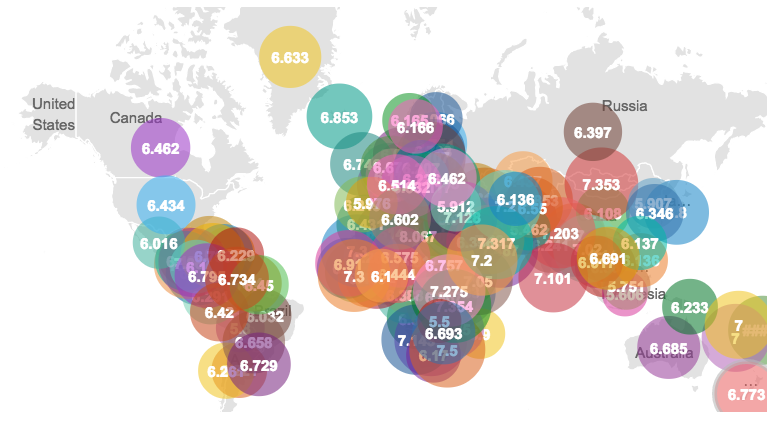

In [11]:
from IPython.display import Image
Image(filename='world map.png')

## 2) Create a wordle from the titles of all movies in a genre. 

Open `genres.list` and output every Comedy movie title to `comedyNames.txt.`

In [12]:
# Create a wordle from the titles of all movies in a genre
# 1. start line at "!Next?" (1994)	Documentary
# 2. discard the titles with {}
# 3. select movie titles only from 1 genre (eg. Comedy)
# 4. remove "" from the movie titles
genresFile = open('genres.list','r')
output = open('comedyNames.txt','w') #or try comedyNames.list

# To start readline() at the right line
while True:
    if genresFile.readline() == "8: THE GENRES LIST\n":
        break;
genresFile.readline()
genresFile.readline()

'\n'

In [13]:
# Remove all the second brackets eg. (TV), (V), (VG)
# Remove all the " " and punctuations from the movie titles
for line in genresFile.readlines():
    genresLine = line.replace("(VG)"," ").replace("(TV)"," ").replace("(V)"," ").rstrip("\n").split()
    
    #position of the genres = len(genresLine)-1
    genres = genresLine[len(genresLine)-1]
    #print genres    # this prints out the genres of every movie
    
    # Only print the name of movies that are under the genre 'Comedy'
    if genres.find("Comedy") != -1:
        
        # Skip the movies with "{}", ie. detect for "}" at position len(genresLine)-2
        genresYear = genresLine[len(genresLine)-2]
        # This skips the movies with "{}"
        if genresYear.find("}") == -1:
            genresMovieName = " ".join(genresLine[0:len(genresLine)-2])
            # Now remove the quotation marks " " around the movie names 
            if genresMovieName.startswith('"') and genresMovieName.endswith('"'):
                genresMovieName = genresMovieName[1:-1]
            
            output.write(genresMovieName)
            output.write("\n")
            #print genresMovieName

    if genresLine=="":
        break

Closing files

In [14]:
genresFile.close()
output.close()

Read `comedyNames.txt`, filter a selected list of stopwords from the movie names, then output the filtered list into a new text file

In [15]:
import re

# Set a list of stopwords to be removed from the movie titles
stopwords = set(('A', 'al', 'Al', 'auf', 'Auf', 'da', 'Da', 'Dans', 'das', 'Das', 'de', 'De', 
                 'del', 'Del', 'der', 'Der', 'des', 'Des', 'di', 'Die', 'du', 'ein', 'Ein',
                  'el', 'El', 'en', 'En', 'es', 'et', 'Et', 'Ich', 'il', 'Il', 'ja', 'la', 
                  'La', 'las', 'Las', 'le', 'Le', 'les', 'Les', 'lo', 'Lo', 'los', 'Los', 
                  'mi', 'Mi', 'na', 'ni', 'Por', 'que', 'Que', 'se', 'Se', 'Um', 'un', 'Un', 
                  'una', 'Una', 'und', 'une', 'Une'))

comedyNames = open('comedyNames.txt')

In [16]:
OUT = open('comedyFiltered.txt', 'w')
for line in comedyNames.readlines():
    movieNames = line.rstrip("\n").split()
    if any(c in movieNames for c in stopwords):
        filteredNames = " ".join([i for i in movieNames if i not in stopwords])
        OUT.write(filteredNames)
        OUT.write("\n")
        #print filteredNames
    else:
        filteredNames = " ".join(movieNames)
        OUT.write(filteredNames)
        OUT.write("\n")
        #print filteredNames
OUT.close()

### Wordle visualization

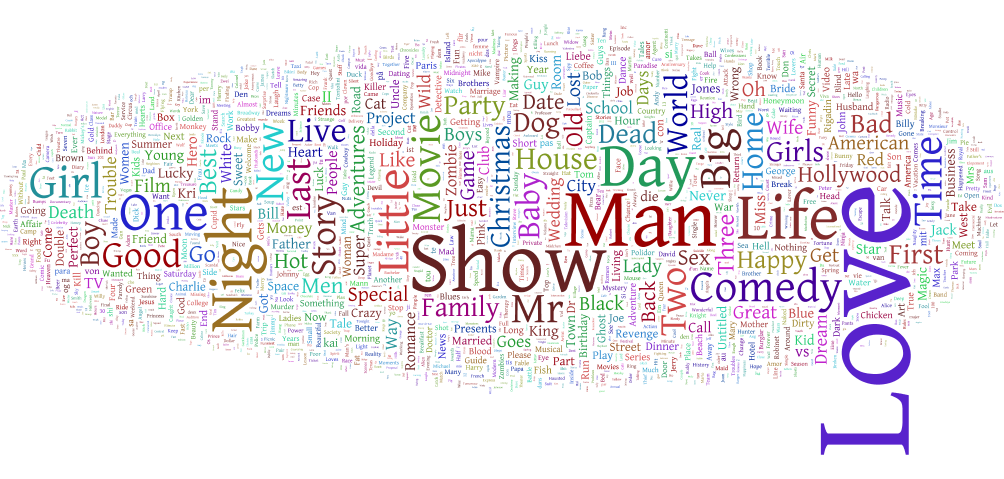

In [19]:
Image(filename='Comedy title wordle.png')

## 3) Create a line chart of the number of movies made in each genre over time. 

Create a line plot (the new IBM Many Eyes doesn't have stackgrpah visualization anymore) of the number of movies made in each genre (for an individual country or all countries combined) over time. 
1. start line at "!Next?" (1994)	Documentary 
2. discard the titles with {}
3. discard the movies where the Year is (????)
4. remove (), remove /I, /II, /III, /IV etc from the movie year

In [20]:
genresFile = open('genres.list','r')
output = open('genreYear.txt','w')

#To start readline() at the right line
while True:
    if genresFile.readline() == "8: THE GENRES LIST\n":
        break;
genresFile.readline()
genresFile.readline()

'\n'

In [21]:
#Remove all the second brackets eg. (TV), (V), (VG)
for line in genresFile.readlines():
    genresLine = line.replace("(VG)"," ").replace("(TV)"," ").replace("(V)"," ").rstrip("\n").split()
    
    #position of the genres = len(genresLine)-1
    genres = genresLine[len(genresLine)-1]
    
    #skip the 1 movie where the genre is _//bbfc.co.uk/releases/import-export-2008-0_
    if genres.find("_") != -1:
        continue
    
    genresYear = genresLine[len(genresLine)-2]
    #remove the parenthesis () around the movie years
    if genresYear.startswith('(') and genresYear.endswith(')'):
        genresYear = genresYear[1:-1]
    
    #skip the movies where the year is ????
    if genresYear.find("?") != -1:
        continue
    
    #Cleanup steps, to remove the /I, /II, /IV, /V, /IX, /X etc from the movie years
    #remove the /V from the movie years
    if genresYear.endswith('V'):
        genresYear = genresYear[0:-2]
    #remove the /I and /II from the movie years
    if genresYear.endswith('I'):
        genresYear = genresYear[0:-2]
    #remove the remaining /I from the movie years
    if genresYear.endswith('I'):
        genresYear = genresYear[0:-2]
    #remove the remaining /V from the movie years
    if genresYear.endswith('V'):
        genresYear = genresYear[0:-2]
    #remove the /X from the movie years
    if genresYear.endswith('X'):
        genresYear = genresYear[0:-2]
    #remove the /X from the movie years
    if genresYear.endswith('X'):
        genresYear = genresYear[0:-2]
    #remove the remaining /X from the movie years
    if genresYear.endswith('X'):
        genresYear = genresYear[0:-2]
    #remove the r/XL from the movie years
    if genresYear.endswith('L'):
        genresYear = genresYear[0:-2]
    #remove all the remaining / from the movie years
    if genresYear.endswith('/'):
        genresYear = genresYear[0:-1]
    
    # skip the movies with {}
    if genresYear.find("}") == -1:
        output.write(genres)
        output.write("\t")
        output.write(genresYear)
        output.write("\n")
        #print genresYear + "\t" + genres
    
    if genresLine=="":
        break

Closing files

In [22]:
genresFile.close()
output.close()

Read genreYear.txt and sort/count the genres and the years
Print out the following format:
```
Year	1880	1887	1888	1889	1890	1891
Action	0	0	0	0	0	1
```
note: `genreYear.txt` has a blank line in the last line, delete that line before running this code

In [23]:
from collections import Counter

with open('genreYear.txt') as sortGY:
    lines = sortGY.read().split('\n')

# Replace separating whitespace with exactly one space
lines = [' '.join(l.split()) for l in lines]

# Sort genres and years
genres = sorted(set(l.split()[0] for l in lines))
years = sorted(set(l.split()[1] for l in lines))

# Count the sorted genres and years
countGY = Counter(lines)

In [24]:
OUT = open("sortedYear.txt", "w")
OUT.write("Year" + "\t",)
print "Year" + '\t',
for y in years:
    OUT.write(y + '\t',)
    print y + '\t',
print
OUT.write('\n')
for g in genres:
    OUT.write(g + '\t',)
    print g + '\t',
    for y in years:
        print `countGY[g + ' ' + y]` + '\t',
        OUT.write(`countGY[g + ' ' + y]` + '\t',)
    OUT.write('\n')
    print
OUT.close()

Year	1874	1878	1887	1888	1889	1890	1891	1892	1893	1894	1895	1896	1897	1898	1899	1900	1901	1902	1903	1904	1905	1906	1907	1908	1909	1910	1911	1912	1913	1914	1915	1916	1917	1918	1919	1920	1921	1922	1923	1924	1925	1926	1927	1928	1929	1930	1931	1932	1933	1934	1935	1936	1937	1938	1939	1940	1941	1942	1943	1944	1945	1946	1947	1948	1949	1950	1951	1952	1953	1954	1955	1956	1957	1958	1959	1960	1961	1962	1963	1964	1965	1966	1967	1968	1969	1970	1971	1972	1973	1974	1975	1976	1977	1978	1979	1980	1981	1982	1983	1984	1985	1986	1987	1988	1989	1990	1991	1992	1993	1994	1995	1996	1997	1998	1999	2000	2001	2002	2003	2004	2005	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019	2020	2021	2022	2024	2025	
Action	0	0	0	0	0	0	1	0	0	3	0	1	3	2	0	1	1	1	9	4	3	0	2	20	5	1	7	9	18	22	39	44	23	19	38	30	35	48	37	45	75	123	79	88	58	55	45	66	48	64	116	84	107	108	106	72	101	96	56	57	51	68	91	104	95	80	73	90	95	70	79	77	125	107	106	132	153	160	162	225	218	281	274	259	293	280	301	355	417	391	297	359	412	385	498

### Lineplot visualization

Note: The movie genres are not properly displayed as the legend on the line plot. 

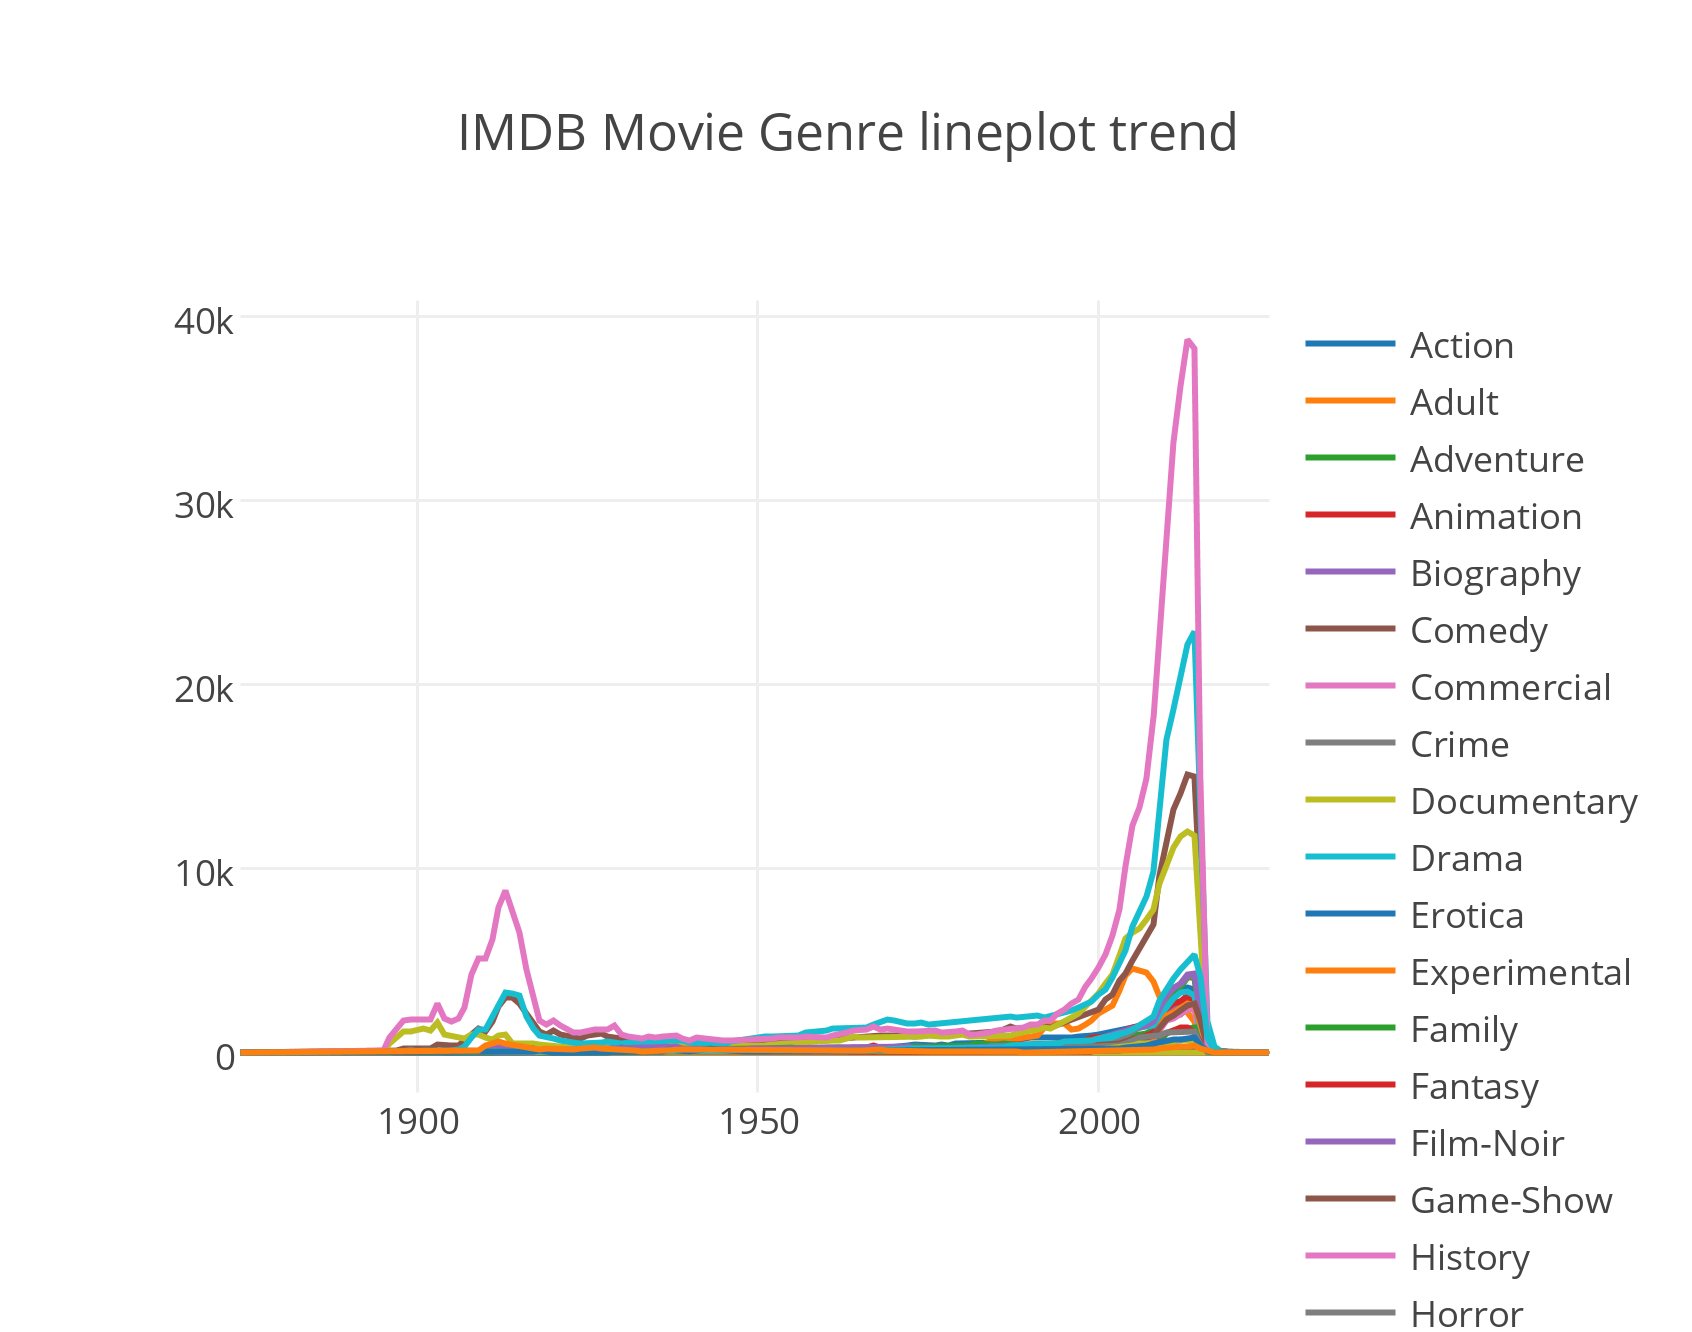

In [25]:
Image(filename='Movie Genre lineplot.png')

According to the IMDB moive genres data, there was an increasing number of films that were produced after 1900 and peaked in 1913, with 8782 Shorts, 3232 Dramas, 2961 Comedies, 976 Documentaries and 498 Westerns as the 5 most popular movie genres that year. There was a sharp decline of movies produced between 1914 and 1917, likely becuase of the onset of World War I that disrupted the movie industry. Of the 33 movie genres, Short, Drama and Comedy remained the 3 most popular movie genres throughout most of the 20th century, except for 1990 to 2009, when Documentary and Adult films emerged as competing genres to Dramas and Comedies. The most number of films were produced in 2013, with 38741 Shorts, 22166 Dramas, 15114 Comedies, 12022 Documentaries and 4976 Thrillers made that year respectively.